# project aims : Using Deep neural network for 4 species classification based on the amino acids polymorphism in ribonucleoside-triphosphate reductase
### by MSc Haizhuang Cai

## this code is only for last part of data pre-processing(vecterizing training data) and model building and training. Other data cleaning process are done in R

### 1.reading csv file and checking data

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [2]:
import os
os.chdir("/Users/caihaizhuang/Desktop/")
os.getcwd()  # Prints the current working directory

'/Users/caihaizhuang/Desktop'

In [3]:
#reading csv file with pandas, remember to add "index" as colnames of first column of data before read the CSV data
import pandas
df = pandas.read_csv('ML_data_test_4example.csv', index_col='index')

In [4]:
df

MLID                                        protein_seq
index                                                         
1         1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
2         1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
3         2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNY...
4         3  LfVEKRDGRRVVFDVDKIDKALHKAADKVMDvtpLVEKRLNDLTER...
5         0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
6         3  LfVEKRDGRRVVFDVDKIDKALHKAADKVMDvtpLVEKRLNDLTER...
7         3  LfVEKRDGRRVVFDVDKIDKALHKAADKVMDvtpLVEKRLDDLTER...
8         2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNH...
9         2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNH...
10        0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
11        0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
12        0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
13        2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNH...
14        1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
15        3  LfVEKRDGRRVVFDVDKIDKALHKAADKVMDvtpLVEKRLNDLTER...
16        1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
17        2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNH...
18        3  LfVEKRDGRRVVFDVDKIDKALHKAADKVMDvtpLVEKRLDDLTER...
19        1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
20        3  LfVEKRDGRRVVFDVDKIDKALHKAADKVMDvtpLVEKRLNDLTER...
21        3  LfVEKRDGRRVVFDVDKIDKALHKAADKVMDvtpLVEKRLDDLTER...
22        0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
23        2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNH...
24        0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
25        1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
26        1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
27        0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
28        1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
29        3  LfVEKRDGRRVVFDVDKIDKALHKAADKVMDvtpLVEKRLNDLTER...
30        1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
...     ...                                                ...
7971      2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNH...
7972      2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNY...
7973      0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
7974      0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
7975      2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNH...
7976      2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNH...
7977      0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
7978      1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
7979      1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
7980      2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNH...
7981      0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
7982      0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
7983      1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDAGYCATVAEVVSSQM...
7984      2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNH...
7985      0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
7986      1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
7987      3  LfVEKRDGRRVVFDVDKIDKALHKAADKVMDvtpLVEKRLNDLTER...
7988      1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
7989      2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNH...
7990      0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
7991      0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
7992      1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
7993      1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
7994      0  VMKRDGCKVPFKSERIKEAILRAAKAAEVDDADYCATVAAVVSEQM...
7995      3  LfVEKRDGRRVVFDVDKIDKALHKAADKVMDvtpLVEKRLNDLTER...
7996      1  VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQM...
7997      3  LfVEKRDGRRVVFDVDKIDKALHKAADKVMDvtpLVEKRLNDLTER...
7998      3  LfVEKRDGRRVVFDVDKIDKALHKAADKVMDvtpLVEKRLDDLTER...
7999      2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNY...
8000      2  IEEALTGliskdpAIVNENANKDSDtFSTMRDLTAGIVSKSYALNY...

[8000 rows x 2 columns]

### 2. vecterizing data with ordinal_encoder

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

samples = [list("VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQMNARSQVDINEIQTAVENQLMSGPYKQLARAYIEYRHDRDIQREKRGRLNQEIRGLVEQtnsALLNENANKDSKvIPTQRDLLAGIVAKHYARQHLLPRDVVQAHERGDIHYHDLDYSPFFPmfNCMLIDLKGMLTQGFKMGNAEIEPPKSISTATAVTAQIIAQVASHIYGGTTINRIDEVLAPFVtesyNKhrktadewqipdaegyarsrteKECYDAFQSLEYEVNTLHTANGQTPFVTFGFGLGTSWESRLIQASILRNRIAGLGkNRKTAVFPKLVFAIRdgLNHKFGDPNYDIKQLALECASKRMYPDILNYDqvVKVTGSFKTPMGCRSFLGVWENENGEqiHDGrnNLGVISLNLPRIALEAKGDETAFWKLLDERLALARKALMTRIARLEGVKARVAPILYMEGacgVRLKadddVSEIFKnGRASISLGYIGIHETINAlFGG"), list("LfVEKRDGRRVVFDVDKIDKALYKAADKVMDvtpLVEKRLNDLTERIITEIHSRFPQGIKIYEIQNIVEHELLEAKEYALAEEYITYRTQRDFERSKATDINFSIHKLLNKdqTVVNENANKDSDvFNTQRDLTAGIVGKSIGLQMLPKHVANAHQKGDIHYHDLDYSPYTPmtNCCLIDFKGMLENGFKIGNAEVESPKSIQTATAQISQIIANVASSQYGGCSADRIDEILAPYAEknyQKHLKDaeewvlpekredyawkktqKDIYDAMQSLEYEINTLFTSNGQTPFTSLGFGLGTSRFEREIQKAILNIRIKGLGsEHRTAIFPKLIFTLKrgLNLEEGTPNYDIKQLALECATKRMYPDVLSYDkIVdltGSFKVPMGCRSFLQGWKDENGVevNSGrmNLGVVTVNLPRIALESEGDMNKFWEIFNERMNIAEDALVYRVERTKEATPANAPILYQYGafghrLGkeesVDQLFKnRRATVSLGYIGLYEVA")]

# We create a tokenizer, configured to only take
# into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)
# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
#sequences = tokenizer.texts_to_sequences("VMKRDGCKVPFKSERIKEAILRAAKAAGVDDADYCATVAEVVSSQMN")

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index

Found 20 unique tokens.


{'a': 2,
 'c': 19,
 'd': 8,
 'e': 3,
 'f': 15,
 'g': 6,
 'h': 17,
 'i': 4,
 'k': 5,
 'l': 1,
 'm': 18,
 'n': 10,
 'p': 16,
 'q': 13,
 'r': 7,
 's': 12,
 't': 11,
 'v': 9,
 'w': 20,
 'y': 14}

In [6]:
# function to convert a AA sequence string to a numpy array
# converts to lower case, changes any non 'laeikgrdvntsqydphmcw' characters to 'z'
import numpy as np
import re
def string_to_array(my_string):
    my_string = my_string.lower()
    my_string = re.sub('[^laeikgrdvntsqydphmcw]', 'z', my_string) #z==>unknown AA seqs
    my_array = np.array(list(my_string))
    return my_array
# create a label encoder with 'laeikgrdvntsqydphmcwz' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['l','a','e','i','k','g','r','d','v','n','t','s','q','y','p','h','m','c','w','z']))

LabelEncoder()

In [7]:
# function to encode a AA sequence string as an ordinal vector 
def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array) 
    float_encoded = integer_encoded.astype(float) 
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.05
    float_encoded[float_encoded == 1] = 0.10
    float_encoded[float_encoded == 2] = 0.15
    float_encoded[float_encoded == 3] = 0.20
    float_encoded[float_encoded == 4] = 0.25 
    float_encoded[float_encoded == 5] = 0.30
    float_encoded[float_encoded == 6] = 0.35
    float_encoded[float_encoded == 7] = 0.40
    float_encoded[float_encoded == 8] = 0.45
    float_encoded[float_encoded == 9] = 0.50
    float_encoded[float_encoded == 10] = 0.55
    float_encoded[float_encoded == 11] = 0.60
    float_encoded[float_encoded == 12] = 0.65
    float_encoded[float_encoded == 13] = 0.70
    float_encoded[float_encoded == 14] = 0.75
    float_encoded[float_encoded == 15] = 0.80
    float_encoded[float_encoded == 16] = 0.85
    float_encoded[float_encoded == 17] = 0.90
    float_encoded[float_encoded == 18] = 0.95
    float_encoded[float_encoded == 19] = 1.00
    float_encoded[float_encoded == 20] = 0.00
    return float_encoded

In [8]:
sequence = ordinal_encoder(string_to_array(df.protein_seq[1]))
sequence

array([0.85, 0.5 , 0.4 , 0.7 , 0.15, 0.25, 0.1 , 0.4 , 0.85, 0.6 , 1.  ,
       0.4 , 0.75, 0.2 , 0.7 , 0.35, 0.4 , 0.2 , 0.05, 0.35, 0.45, 0.7 ,
       0.05, 0.05, 0.4 , 0.05, 0.05, 0.25, 0.85, 0.15, 0.15, 0.05, 0.15,
       0.95, 0.1 , 0.05, 0.8 , 0.85, 0.05, 0.2 , 0.85, 0.85, 0.75, 0.75,
       0.65, 0.5 , 0.55, 0.05, 0.7 , 0.75, 0.65, 0.85, 0.15, 0.35, 0.55,
       0.2 , 0.35, 0.65, 0.8 , 0.05, 0.85, 0.2 , 0.55, 0.65, 0.45, 0.5 ,
       0.75, 0.25, 0.6 , 0.95, 0.4 , 0.65, 0.45, 0.05, 0.7 , 0.05, 0.95,
       0.35, 0.2 , 0.95, 0.7 , 0.3 , 0.15, 0.7 , 0.15, 0.35, 0.65, 0.7 ,
       0.2 , 0.4 , 0.7 , 0.25, 0.7 , 0.45, 0.55, 0.65, 0.2 , 0.35, 0.7 ,
       0.25, 0.45, 0.85, 0.2 , 0.65, 0.8 , 0.55, 0.75, 0.05, 0.45, 0.45,
       0.55, 0.2 , 0.55, 0.05, 0.55, 0.4 , 0.15, 0.75, 0.4 , 0.85, 0.35,
       0.6 , 0.8 , 0.65, 0.7 , 0.15, 0.45, 0.45, 0.05, 0.25, 0.35, 0.85,
       0.05, 0.4 , 0.3 , 0.95, 0.05, 0.7 , 0.65, 0.3 , 0.45, 0.45, 0.6 ,
       0.7 , 0.15, 0.85, 0.85, 0.65, 0.05, 0.3 , 0.

### 3.Convert all training data and label to numpy array(required input data format)

In [9]:
#convert the training data to vectors and then numpy array
import numpy as np

sequences = []
for sequence in df.protein_seq:
    sequence = ordinal_encoder(string_to_array(sequence))
    sequence = np.array(sequence).tolist()
    sequences.append(sequence)
sequences

[[0.85,
  0.5,
  0.4,
  0.7,
  0.15,
  0.25,
  0.1,
  0.4,
  0.85,
  0.6,
  1.0,
  0.4,
  0.75,
  0.2,
  0.7,
  0.35,
  0.4,
  0.2,
  0.05,
  0.35,
  0.45,
  0.7,
  0.05,
  0.05,
  0.4,
  0.05,
  0.05,
  0.25,
  0.85,
  0.15,
  0.15,
  0.05,
  0.15,
  0.95,
  0.1,
  0.05,
  0.8,
  0.85,
  0.05,
  0.2,
  0.85,
  0.85,
  0.75,
  0.75,
  0.65,
  0.5,
  0.55,
  0.05,
  0.7,
  0.75,
  0.65,
  0.85,
  0.15,
  0.35,
  0.55,
  0.2,
  0.35,
  0.65,
  0.8,
  0.05,
  0.85,
  0.2,
  0.55,
  0.65,
  0.45,
  0.5,
  0.75,
  0.25,
  0.6,
  0.95,
  0.4,
  0.65,
  0.45,
  0.05,
  0.7,
  0.05,
  0.95,
  0.35,
  0.2,
  0.95,
  0.7,
  0.3,
  0.15,
  0.7,
  0.15,
  0.35,
  0.65,
  0.7,
  0.2,
  0.4,
  0.7,
  0.25,
  0.7,
  0.45,
  0.55,
  0.65,
  0.2,
  0.35,
  0.7,
  0.25,
  0.45,
  0.85,
  0.2,
  0.65,
  0.8,
  0.55,
  0.75,
  0.05,
  0.45,
  0.45,
  0.55,
  0.2,
  0.55,
  0.05,
  0.55,
  0.4,
  0.15,
  0.75,
  0.4,
  0.85,
  0.35,
  0.6,
  0.8,
  0.65,
  0.7,
  0.15,
  0.45,
  0.45,
  0.05,
  0.25,
  0.3

In [10]:
sequences_1 = np.asarray(sequences)
sequences_1.shape

(8000, 500)

In [11]:
IDs = []
for ID in df.MLID:
    IDs.append(ID)

In [12]:
IDs = np.asarray(IDs)
IDs

array([1, 1, 2, ..., 3, 2, 2])

### split the data into two part

In [15]:
#part1 for model training and validation/ part 2 for model test
X = sequences_1  #sequences
y = IDs
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print("\nX_train:\n")
X_train

print("\nX_test:\n")
X_test





X_train:


X_test:



array([[0.85, 0.5 , 0.4 , ..., 1.  , 0.25, 0.25],
       [0.85, 0.5 , 0.4 , ..., 1.  , 0.25, 0.25],
       [0.85, 0.5 , 0.4 , ..., 1.  , 0.25, 0.25],
       ...,
       [0.85, 0.5 , 0.4 , ..., 1.  , 0.25, 0.25],
       [0.35, 0.2 , 0.2 , ..., 0.15, 0.95, 0.6 ],
       [0.35, 0.2 , 0.2 , ..., 0.15, 0.95, 0.6 ]])

In [16]:
y_test

array([1, 0, 1, ..., 0, 2, 2])

### 4. model building and training

In [1]:
#Conv1D neural network with Max pooling
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.layers import Dense, Activation, SimpleRNN, Flatten
model = Sequential()
#model.add(Dense(128, input_shape=(500,1)))
model.add(layers.Embedding(20, 64, input_length= 500 ))
model.add(layers.Conv1D(64, 5))
model.add(layers.MaxPooling1D(10))
model.add(Dense(64))
#model.add(layers.Conv1D(32, 2, activation='relu'))
#model.add(layers.GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(5, activation='sigmoid'))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 64)           1280      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 64)           20544     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 64)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 49, 64)            4160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 15685     
Total params: 41,669
Trainable params: 41,669
Non-trainable params: 0


In [159]:
model.compile(optimizer=RMSprop(lr=2e-5),
              loss='sparse_categorical_crossentropy',
              #loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(sequences_1, IDs,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/20
6400/6400 [==============================] - 132s 21ms/step - loss: 1.5365 - acc: 0.5761 - val_loss: 1.4641 - val_acc: 0.7594
Epoch 2/20
6400/6400 [==============================] - 131s 20ms/step - loss: 1.3850 - acc: 0.7809 - val_loss: 1.3029 - val_acc: 0.9962
Epoch 3/20
6400/6400 [==============================] - 131s 20ms/step - loss: 1.2149 - acc: 0.9427 - val_loss: 1.1131 - val_acc: 0.9962
Epoch 4/20
6400/6400 [==============================] - 130s 20ms/step - loss: 0.9850 - acc: 0.9864 - val_loss: 0.8416 - val_acc: 0.9975
Epoch 5/20
6400/6400 [==============================] - 134s 21ms/step - loss: 0.7135 - acc: 0.9789 - val_loss: 0.5867 - val_acc: 0.9956
Epoch 6/20
6400/6400 [==============================] - 131s 20ms/step - loss: 0.4942 - acc: 0.9964 - val_loss: 0.4028 - val_acc: 0.9956
Epoch 7/20
6400/6400 [==============================] - 129s 20ms/step - loss: 0.3409 - acc: 0.9973 - val_loss: 0.2754 - val_acc: 

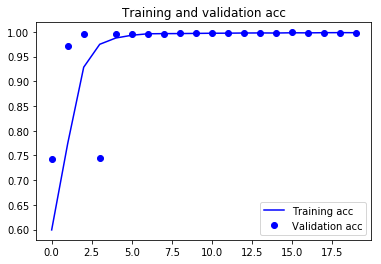

In [154]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.show()

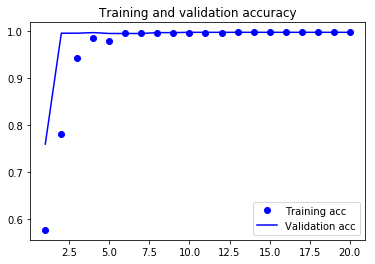

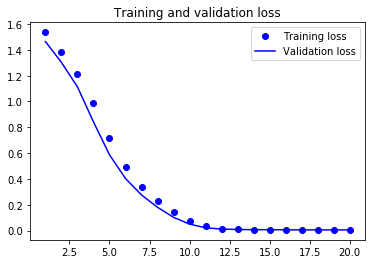

In [160]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [161]:
#Conv1D neural network with Average pooling
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.layers import Dense, Activation, SimpleRNN, Flatten, Dropout
model = Sequential()
#model.add(Dense(128, input_shape=(30,1)))
model.add(layers.Embedding(20, 64, input_length= 500 ))
model.add(layers.Conv1D(64, 4, activation='relu'))
model.add(layers.AveragePooling1D(4))
model.add(Dense(64))
model.add(Dropout(rate = 1 - 0.9))
model.add(Dense(64))
model.add(Dropout(rate = 1 - 0.9))
model.add(Dense(64))
model.add(Dropout(rate = 1 - 0.9))
model.add(Dense(64))
model.add(Dropout(rate = 1 - 0.9))
model.add(Dense(64)) 
#model.add(layers.Conv1D(32, 2, activation='relu'))
#model.add(layers.GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

In [162]:
#import tflearn as tf
#x_train = X_train

model.compile(optimizer=RMSprop(lr=2e-5),
              loss='sparse_categorical_crossentropy',
              #loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(sequences_1, IDs,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/20
6400/6400 [==============================] - 137s 21ms/step - loss: 1.5029 - acc: 0.7556 - val_loss: 1.3908 - val_acc: 0.7438
Epoch 2/20
6400/6400 [==============================] - 136s 21ms/step - loss: 1.2574 - acc: 0.7887 - val_loss: 1.1143 - val_acc: 0.9956
Epoch 3/20
6400/6400 [==============================] - 135s 21ms/step - loss: 0.9681 - acc: 0.8662 - val_loss: 0.8058 - val_acc: 0.9906
Epoch 4/20
6400/6400 [==============================] - 135s 21ms/step - loss: 0.6507 - acc: 0.9125 - val_loss: 0.4956 - val_acc: 0.9956
Epoch 5/20
6400/6400 [==============================] - 134s 21ms/step - loss: 0.4017 - acc: 0.9598 - val_loss: 0.3189 - val_acc: 0.9931
Epoch 6/20
6400/6400 [==============================] - 137s 21ms/step - loss: 0.2839 - acc: 0.9930 - val_loss: 0.2413 - val_acc: 0.9938
Epoch 7/20
6400/6400 [==============================] - 140s 22ms/step - loss: 0.2090 - acc: 0.9969 - val_loss: 0.1646 - val_acc: 

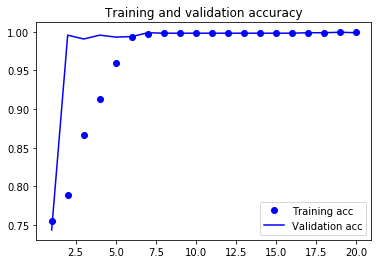

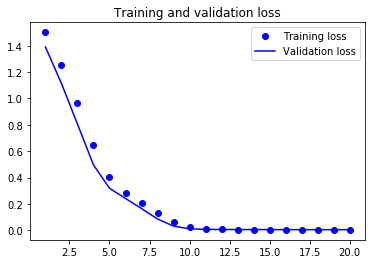

In [163]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comparison between three different model architecture

### 1.simple neural network

In [63]:
###model building
#Conv1D neural network with Max pooling
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.layers import Dense, Activation, SimpleRNN, Flatten
# as first layer in a sequential model:
model = Sequential()
model.add(Dense(64, input_shape=(500,)))
# now the model will take as input arrays of shape (*, 16)
# and output arrays of shape (*, 32)

# after the first layer, you don't need to specify
# the size of the input anymore:
model.add(Dense(4, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                32064     
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 260       
Total params: 32,324
Trainable params: 32,324
Non-trainable params: 0
_________________________________________________________________


In [61]:
### model training process with optimal epoch(early optimal)
import datetime
starttime = datetime.datetime.now()
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              #loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.25)
endtime = datetime.datetime.now()
print (endtime - starttime) #time escape for the training process

Train on 4800 samples, validate on 1600 samples
Epoch 1/30
4800/4800 [==============================] - ETA: 0s - loss: 0.7843 - acc: 0.846 - 1s 265us/step - loss: 0.7547 - acc: 0.8558 - val_loss: 0.3750 - val_acc: 0.9806
Epoch 2/30
4800/4800 [==============================] - 1s 111us/step - loss: 0.2869 - acc: 0.9871 - val_loss: 0.2355 - val_acc: 0.9900
Epoch 3/30
4800/4800 [==============================] - 1s 120us/step - loss: 0.1992 - acc: 0.9942 - val_loss: 0.1770 - val_acc: 0.9900
Epoch 4/30
4800/4800 [==============================] - 1s 110us/step - loss: 0.1508 - acc: 0.9948 - val_loss: 0.1359 - val_acc: 0.9919
Epoch 5/30
4800/4800 [==============================] - 1s 108us/step - loss: 0.1166 - acc: 0.9954 - val_loss: 0.1088 - val_acc: 0.9950
Epoch 6/30
4800/4800 [==============================] - 1s 106us/step - loss: 0.0901 - acc: 0.9960 - val_loss: 0.0835 - val_acc: 0.9950
Epoch 7/30
4800/4800 [==============================] - 1s 105us/step - loss: 0.0696 - acc: 0.9965

In [64]:
### model training process with optimal epoch(early optimal)
import datetime
starttime = datetime.datetime.now()
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              #loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=18,
                    batch_size=64,
                    validation_split=0.25)
endtime = datetime.datetime.now()
print (endtime - starttime) #time escape for the training process

Train on 4800 samples, validate on 1600 samples
Epoch 1/18
4800/4800 [==============================] - 1s 276us/step - loss: 0.7187 - acc: 0.7171 - val_loss: 0.4213 - val_acc: 0.9319
Epoch 2/18
4800/4800 [==============================] - 1s 107us/step - loss: 0.3503 - acc: 0.8883 - val_loss: 0.3096 - val_acc: 0.7650
Epoch 3/18
4800/4800 [==============================] - 1s 105us/step - loss: 0.2653 - acc: 0.9792 - val_loss: 0.2350 - val_acc: 0.9919
Epoch 4/18
4800/4800 [==============================] - 1s 106us/step - loss: 0.2037 - acc: 0.9925 - val_loss: 0.1813 - val_acc: 0.9919
Epoch 5/18
4800/4800 [==============================] - 1s 112us/step - loss: 0.1591 - acc: 0.9938 - val_loss: 0.1412 - val_acc: 0.9919
Epoch 6/18
4800/4800 [==============================] - 1s 111us/step - loss: 0.1235 - acc: 0.9938 - val_loss: 0.1100 - val_acc: 0.9931
Epoch 7/18
4800/4800 [==============================] - 1s 121us/step - loss: 0.0955 - acc: 0.9944 - val_loss: 0.0867 - val_acc: 0.9931


In [65]:
model.evaluate(X_test, y_test)

1600/1600 [==============================] - 0s 71us/step


[0.01484526098240167, 0.99625]

### 2. simple neural network with one hidden layer

In [69]:
###model building
#Conv1D neural network with Max pooling
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.layers import Dense, Activation, SimpleRNN, Flatten
# as first layer in a sequential model:
model = Sequential()
model.add(Dense(64, input_shape=(500,)))
# now the model will take as input arrays of shape (*, 16)
# and output arrays of shape (*, 32)
model.add(Dense(64))
# after the first layer, you don't need to specify
# the size of the input anymore:
model.add(Dense(4, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                32064     
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 260       
Total params: 36,484
Trainable params: 36,484
Non-trainable params: 0
_________________________________________________________________


In [67]:
### model training process with optimal epoch(early optimal)
import datetime
starttime = datetime.datetime.now()
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              #loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.25)
endtime = datetime.datetime.now()
print (endtime - starttime) #time escape for the training process

Train on 4800 samples, validate on 1600 samples
Epoch 1/30
4800/4800 [==============================] - 2s 317us/step - loss: 0.6542 - acc: 0.8106 - val_loss: 0.3207 - val_acc: 0.9900
Epoch 2/30
4800/4800 [==============================] - 1s 128us/step - loss: 0.2527 - acc: 0.9796 - val_loss: 0.2145 - val_acc: 0.9875
Epoch 3/30
4800/4800 [==============================] - 1s 128us/step - loss: 0.1712 - acc: 0.9944 - val_loss: 0.1409 - val_acc: 0.9925
Epoch 4/30
4800/4800 [==============================] - 1s 128us/step - loss: 0.1124 - acc: 0.9948 - val_loss: 0.0908 - val_acc: 0.9919
Epoch 5/30
4800/4800 [==============================] - 1s 128us/step - loss: 0.0695 - acc: 0.9950 - val_loss: 0.0573 - val_acc: 0.9950
Epoch 6/30
4800/4800 [==============================] - 1s 137us/step - loss: 0.0431 - acc: 0.9965 - val_loss: 0.0384 - val_acc: 0.9950
Epoch 7/30
4800/4800 [==============================] - 1s 148us/step - loss: 0.0296 - acc: 0.9960 - val_loss: 0.0279 - val_acc: 0.9950


In [70]:
### model training process with optimal epoch(early optimal)
import datetime
starttime = datetime.datetime.now()
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              #loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=64,
                    validation_split=0.25)
endtime = datetime.datetime.now()
print (endtime - starttime) #time escape for the training process

Train on 4800 samples, validate on 1600 samples
Epoch 1/25
4800/4800 [==============================] - 2s 348us/step - loss: 0.6716 - acc: 0.6931 - val_loss: 0.3776 - val_acc: 0.7406
Epoch 2/25
4800/4800 [==============================] - 1s 130us/step - loss: 0.3075 - acc: 0.9340 - val_loss: 0.2604 - val_acc: 0.9931
Epoch 3/25
4800/4800 [==============================] - 1s 146us/step - loss: 0.2185 - acc: 0.9917 - val_loss: 0.1851 - val_acc: 0.9919
Epoch 4/25
4800/4800 [==============================] - 1s 133us/step - loss: 0.1509 - acc: 0.9946 - val_loss: 0.1254 - val_acc: 0.9919
Epoch 5/25
4800/4800 [==============================] - 1s 132us/step - loss: 0.1004 - acc: 0.9954 - val_loss: 0.0887 - val_acc: 0.9925
Epoch 6/25
4800/4800 [==============================] - 1s 128us/step - loss: 0.0643 - acc: 0.9958 - val_loss: 0.0551 - val_acc: 0.9925
Epoch 7/25
4800/4800 [==============================] - 1s 129us/step - loss: 0.0418 - acc: 0.9965 - val_loss: 0.0418 - val_acc: 0.9956


In [71]:
model.evaluate(X_test, y_test)

1600/1600 [==============================] - 0s 69us/step


[0.012611639859969728, 0.99625]

### 3.Deep convolutional neural network

In [76]:
###model building
#Conv1D neural network with Max pooling
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.layers import Dense, Activation, SimpleRNN, Flatten
model = Sequential()
model.add(Dense(64, input_shape=(500,1)))
#model.add(layers.Embedding(20, 64, input_length= 500 ))
model.add(layers.Conv1D(64, 5))
model.add(layers.MaxPooling1D(10))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(64))
#model.add(Flatten())
model.add(Dense(4, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 500, 64)           128       
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 496, 64)           20544     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 49, 64)            0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 45, 64)            20544     
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 64)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 260       
Total para

In [73]:
import numpy as np
x_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
x_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
np.shape(x_train)

(6400, 500, 1)

In [74]:
x_train

array([[[0.35],
        [0.2 ],
        [0.2 ],
        ...,
        [0.15],
        [0.95],
        [0.6 ]],

       [[0.85],
        [0.5 ],
        [0.4 ],
        ...,
        [1.  ],
        [0.25],
        [0.25]],

       [[0.85],
        [0.5 ],
        [0.4 ],
        ...,
        [1.  ],
        [0.25],
        [0.25]],

       ...,

       [[0.85],
        [0.5 ],
        [0.4 ],
        ...,
        [1.  ],
        [0.25],
        [0.25]],

       [[0.45],
        [1.  ],
        [0.85],
        ...,
        [0.2 ],
        [0.85],
        [0.05]],

       [[0.35],
        [0.2 ],
        [0.2 ],
        ...,
        [0.15],
        [0.95],
        [0.6 ]]])

In [75]:
### model training process with optimal epoch(early optimal)
import datetime
starttime = datetime.datetime.now()
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              #loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.25)
endtime = datetime.datetime.now()
print (endtime - starttime) #time escape for the training process

Train on 4800 samples, validate on 1600 samples
Epoch 1/30
4800/4800 [==============================] - 104s 22ms/step - loss: 1.3332 - acc: 0.6894 - val_loss: 1.2848 - val_acc: 0.9794
Epoch 2/30
4800/4800 [==============================] - 102s 21ms/step - loss: 1.2018 - acc: 0.8233 - val_loss: 1.0942 - val_acc: 0.9944
Epoch 3/30
4800/4800 [==============================] - 102s 21ms/step - loss: 0.9225 - acc: 0.8863 - val_loss: 0.7397 - val_acc: 0.9981
Epoch 4/30
4800/4800 [==============================] - 103s 21ms/step - loss: 0.5862 - acc: 0.9506 - val_loss: 0.4552 - val_acc: 0.9856
Epoch 5/30
4800/4800 [==============================] - 102s 21ms/step - loss: 0.3680 - acc: 0.9952 - val_loss: 0.2914 - val_acc: 1.0000
Epoch 6/30
4800/4800 [==============================] - 101s 21ms/step - loss: 0.2377 - acc: 0.9965 - val_loss: 0.1897 - val_acc: 1.0000
Epoch 7/30
4800/4800 [==============================] - 101s 21ms/step - loss: 0.1492 - acc: 0.9983 - val_loss: 0.1158 - val_acc: 

KeyboardInterrupt: 

In [77]:
### model training process with optimal epoch(early optimal)
import datetime
starttime = datetime.datetime.now()
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              #loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.25)
endtime = datetime.datetime.now()
print (endtime - starttime) #time escape for the training process

Train on 4800 samples, validate on 1600 samples
Epoch 1/5
4800/4800 [==============================] - 105s 22ms/step - loss: 1.3478 - acc: 0.5454 - val_loss: 1.3093 - val_acc: 0.9881
Epoch 2/5
4800/4800 [==============================] - 109s 23ms/step - loss: 1.2441 - acc: 0.8515 - val_loss: 1.1510 - val_acc: 0.9912
Epoch 3/5
4800/4800 [==============================] - 114s 24ms/step - loss: 1.0034 - acc: 0.9092 - val_loss: 0.8423 - val_acc: 0.9794
Epoch 4/5
4800/4800 [==============================] - 108s 22ms/step - loss: 0.6878 - acc: 0.9250 - val_loss: 0.5533 - val_acc: 0.9975
Epoch 5/5
4800/4800 [==============================] - 106s 22ms/step - loss: 0.4553 - acc: 0.9633 - val_loss: 0.3748 - val_acc: 0.9950
0:09:02.544014


In [78]:
model.evaluate(x_test, y_test)

1600/1600 [==============================] - 10s 6ms/step


[0.37288785696029664, 0.9975]

### 4.deep convolutional neural network with word embedding layer

In [86]:
###model building
#Conv1D neural network with Max pooling
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.layers import Dense, Activation, SimpleRNN, Flatten
model = Sequential()
#model.add(Dense(128, input_shape=(500,1)))
model.add(layers.Embedding(20, 64, input_length= 500 ))
model.add(layers.Conv1D(64, 5))
model.add(layers.MaxPooling1D(10))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(64))
#model.add(Flatten())
model.add(Dense(4, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 64)           1280      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 496, 64)           20544     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 49, 64)            0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 45, 64)            20544     
_________________________________________________________________
global_max_pooling1d_15 (Glo (None, 64)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_63 (Dense)             (None, 4)                 260       
Total para

In [83]:
### model training process with optimal epoch(early optimal)
import datetime
starttime = datetime.datetime.now()
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              #loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.25)
endtime = datetime.datetime.now()
print (endtime - starttime) #time escape for the training process

Train on 4800 samples, validate on 1600 samples
Epoch 1/30
4800/4800 [==============================] - 107s 22ms/step - loss: 1.3668 - acc: 0.6050 - val_loss: 1.3421 - val_acc: 0.9906
Epoch 2/30
4800/4800 [==============================] - 114s 24ms/step - loss: 1.2929 - acc: 0.8527 - val_loss: 1.2195 - val_acc: 0.7625
Epoch 3/30
4800/4800 [==============================] - 105s 22ms/step - loss: 1.0744 - acc: 0.9135 - val_loss: 0.8788 - val_acc: 0.7688
Epoch 4/30
4800/4800 [==============================] - 108s 22ms/step - loss: 0.6598 - acc: 0.9419 - val_loss: 0.4598 - val_acc: 0.9912
Epoch 5/30
4800/4800 [==============================] - 106s 22ms/step - loss: 0.3345 - acc: 0.9942 - val_loss: 0.2441 - val_acc: 0.9912
Epoch 6/30
4800/4800 [==============================] - 104s 22ms/step - loss: 0.1784 - acc: 0.9944 - val_loss: 0.1265 - val_acc: 0.9912
Epoch 7/30
4800/4800 [==============================] - 106s 22ms/step - loss: 0.0866 - acc: 0.9948 - val_loss: 0.0562 - val_acc: 

KeyboardInterrupt: 

In [87]:
### model training process with optimal epoch(early optimal)
import datetime
starttime = datetime.datetime.now()
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              #loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=11,
                    batch_size=64,
                    validation_split=0.25)
endtime = datetime.datetime.now()
print (endtime - starttime) #time escape for the training process

Train on 4800 samples, validate on 1600 samples
Epoch 1/11
4800/4800 [==============================] - 102s 21ms/step - loss: 1.3703 - acc: 0.4552 - val_loss: 1.3528 - val_acc: 0.7375
Epoch 2/11
4800/4800 [==============================] - 105s 22ms/step - loss: 1.3166 - acc: 0.8054 - val_loss: 1.2655 - val_acc: 0.7381
Epoch 3/11
4800/4800 [==============================] - 104s 22ms/step - loss: 1.1681 - acc: 0.7488 - val_loss: 1.0351 - val_acc: 0.7381
Epoch 4/11
4800/4800 [==============================] - 104s 22ms/step - loss: 0.8398 - acc: 0.8675 - val_loss: 0.6383 - val_acc: 0.9919
Epoch 5/11
4800/4800 [==============================] - 107s 22ms/step - loss: 0.4844 - acc: 0.9788 - val_loss: 0.3673 - val_acc: 0.9950
Epoch 6/11
4800/4800 [==============================] - 105s 22ms/step - loss: 0.2960 - acc: 0.9917 - val_loss: 0.2448 - val_acc: 0.9912
Epoch 7/11
4800/4800 [==============================] - 103s 22ms/step - loss: 0.1941 - acc: 0.9950 - val_loss: 0.1540 - val_acc: 

In [88]:
model.evaluate(X_test, y_test)

1600/1600 [==============================] - 9s 6ms/step


[0.014312087181024254, 0.9975]